<a href="https://colab.research.google.com/github/bharat-mullapudi/LSTM_SOC_RUL/blob/main/may5run_att2dec17R3implementation_1_SOC_LSTM_CALCE_IC2_25deg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [3]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/Incremental_temp_25.xlsx')

In [4]:
df

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000167,1.0,0.0,4.166209,0.0,0.0,1,0.97
1,20.015713,1.0,0.0,4.166047,0.0,0.0,10.015546,0.980028
2,30.031239,1.0,0.0,4.166047,0.0,0.0,10.015526,0.980028
3,40.046793,1.0,0.0,4.166209,0.0,0.0,10.015553,0.980123
4,50.062341,1.0,0.0,4.166047,0.0,0.0,10.015548,0.980028
...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,,
1048571,NaN,NaN,NaN,NaN,NaN,NaN,,
1048572,NaN,NaN,NaN,NaN,NaN,NaN,,
1048573,NaN,NaN,NaN,NaN,NaN,NaN,,


In [5]:
df=df.dropna()

In [6]:
combined_data=df

In [ ]:
combined_data.to_csv('Incremental_Init_0.csv')
combined_data=pd.read_csv('Incremental_Init_0.csv')

In [7]:
combined_data.describe()

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah)
count,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000,142119.000000
mean,78705.582922,9.029032,-0.007765,3.684208,0.412327,1.481353
std,41479.490967,4.802561,0.303031,0.207378,0.539736,0.625663
min,10.000167,1.000000,-1.000233,2.499903,0.000000,0.000000
25%,42831.169001,5.000000,0.000000,3.577119,0.016146,0.999809
50%,78728.254274,9.000000,0.000000,3.661715,0.016146,1.799699
75%,114616.556029,13.000000,0.000000,3.839495,0.815788,1.987336
max,150507.800260,18.000000,0.999904,4.375753,1.692307,1.987336


In [8]:
###
combined_data=combined_data.drop_duplicates()
#combined_data.set_index('Data_Point',inplace=True)
#cd2=combined_data.drop(63990)
#cdcombined_data.drop(127979)

#cd2=combined_data;

In [9]:
combined_data

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000167,1.0,0.000000,4.166209,0.000000,0.000000,1,0.97
1,20.015713,1.0,0.000000,4.166047,0.000000,0.000000,10.015546,0.980028
2,30.031239,1.0,0.000000,4.166047,0.000000,0.000000,10.015526,0.980028
3,40.046793,1.0,0.000000,4.166209,0.000000,0.000000,10.015553,0.980123
4,50.062341,1.0,0.000000,4.166047,0.000000,0.000000,10.015548,0.980028
...,...,...,...,...,...,...,...,...
142114,150503.768645,18.0,0.999544,4.249022,1.691192,1.987336,1.015622,0.88911
142115,150504.768729,18.0,0.999364,4.249184,1.691470,1.987336,1.000084,0.889249
142116,150505.784258,18.0,0.999544,4.249508,1.691752,1.987336,1.015528,0.88939
142117,150506.784411,18.0,0.999544,4.249671,1.692029,1.987336,1.000153,0.889528


In [10]:
combined_data=combined_data.iloc[:,1:] #drop first column
combined_data.shape
combined_data

,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,1.0,0.000000,4.166209,0.000000,0.000000,1,0.97
1,1.0,0.000000,4.166047,0.000000,0.000000,10.015546,0.980028
2,1.0,0.000000,4.166047,0.000000,0.000000,10.015526,0.980028
3,1.0,0.000000,4.166209,0.000000,0.000000,10.015553,0.980123
4,1.0,0.000000,4.166047,0.000000,0.000000,10.015548,0.980028
...,...,...,...,...,...,...,...
142114,18.0,0.999544,4.249022,1.691192,1.987336,1.015622,0.88911
142115,18.0,0.999364,4.249184,1.691470,1.987336,1.000084,0.889249
142116,18.0,0.999544,4.249508,1.691752,1.987336,1.015528,0.88939
142117,18.0,0.999544,4.249671,1.692029,1.987336,1.000153,0.889528


In [ ]:
#combined_data.to_csv('cd.csv')
#files.download('cd.csv')

In [11]:
combined_data=combined_data.drop(columns=['Charge_Capacity(Ah)','Discharge_Capacity(Ah)','TimeDelta'])

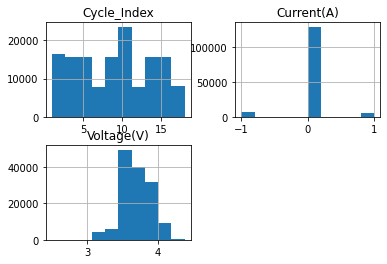

<Figure size 1440x1440 with 0 Axes>

In [12]:
combined_data.hist()
plt.figure(figsize=(20,20))
plt.show()

In [14]:
combined_data=combined_data.drop(columns=['Test_Time(s)'])

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4ce1f1310>,
      dtype=object)

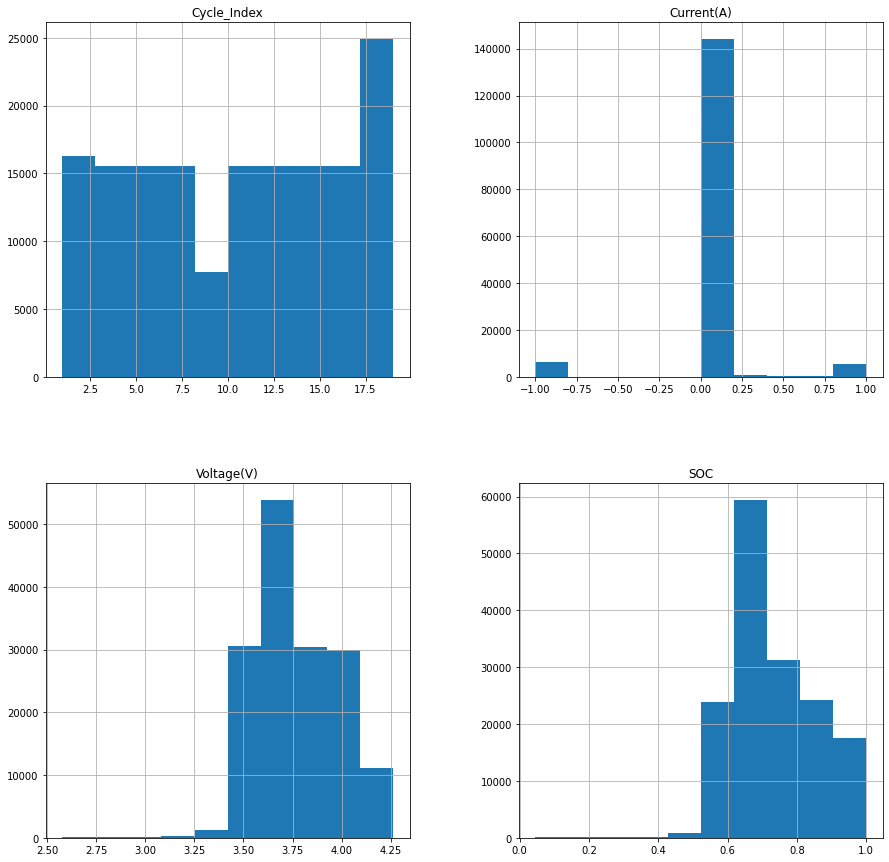

In [ ]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

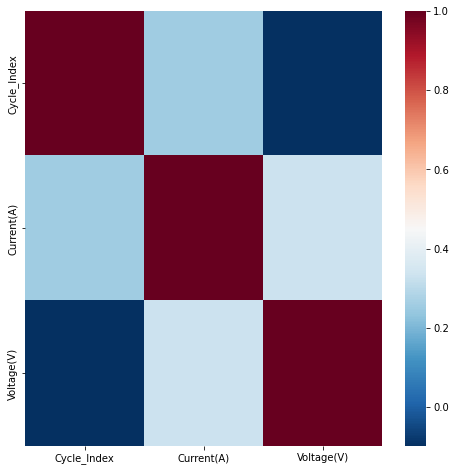

In [15]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [16]:
combined_data.describe()

,Cycle_Index,Current(A),Voltage(V)
count,142119.000000,142119.000000,142119.000000
mean,9.029032,-0.007765,3.684208
std,4.802561,0.303031,0.207378
min,1.000000,-1.000233,2.499903
25%,5.000000,0.000000,3.577119
50%,9.000000,0.000000,3.661715
75%,13.000000,0.000000,3.839495
max,18.000000,0.999904,4.375753


Deleting 0 valued columns

In [17]:
#cd2=pd.read_csv('/content/drive/MyDrive/LSTM_SOC_Implementation/r1.csv')
cd2=combined_data
cd2.describe()

,Cycle_Index,Current(A),Voltage(V)
count,142119.000000,142119.000000,142119.000000
mean,9.029032,-0.007765,3.684208
std,4.802561,0.303031,0.207378
min,1.000000,-1.000233,2.499903
25%,5.000000,0.000000,3.577119
50%,9.000000,0.000000,3.661715
75%,13.000000,0.000000,3.839495
max,18.000000,0.999904,4.375753


In [18]:
cd2

,Cycle_Index,Current(A),Voltage(V),SOC
0,1.0,0.000000,4.166209,0.97
1,1.0,0.000000,4.166047,0.980028
2,1.0,0.000000,4.166047,0.980028
3,1.0,0.000000,4.166209,0.980123
4,1.0,0.000000,4.166047,0.980028
...,...,...,...,...
142114,18.0,0.999544,4.249022,0.88911
142115,18.0,0.999364,4.249184,0.889249
142116,18.0,0.999544,4.249508,0.88939
142117,18.0,0.999544,4.249671,0.889528


In [19]:
y = cd2.SOC
X = cd2.drop(['SOC'], axis=1)

In [20]:
X.describe()

,Cycle_Index,Current(A),Voltage(V)
count,142119.000000,142119.000000,142119.000000
mean,9.029032,-0.007765,3.684208
std,4.802561,0.303031,0.207378
min,1.000000,-1.000233,2.499903
25%,5.000000,0.000000,3.577119
50%,9.000000,0.000000,3.661715
75%,13.000000,0.000000,3.839495
max,18.000000,0.999904,4.375753


split

In [21]:
cd2.values

array([[1.0, 0.0, 4.1662092208862305, 0.97],
       [1.0, 0.0, 4.166047096252441, 0.9800277036779067],
       [1.0, 0.0, 4.166047096252441, 0.9800277036779067],
       ...,
       [18.0, 0.9995440244674683, 4.249508380889893, 0.8893895688644523],
       [18.0, 0.9995440244674683, 4.249670505523682, 0.8895284156939548],
       [18.0, 0.9995440244674683, 4.2498321533203125, 0.889669441477086]],
      dtype=object)

In [22]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
dataset = cd2.SOC.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [25]:
# reshape into X=t and Y=t+1
look_back = 3

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [26]:
X_train

array([[0.98127282, 0.99141706, 0.99141706],
       [0.99141706, 0.99141706, 0.99151354],
       [0.99141706, 0.99151354, 0.99141706],
       ...,
       [0.69930767, 0.69950048, 0.69930767],
       [0.69950048, 0.69930767, 0.6992112 ],
       [0.69930767, 0.6992112 , 0.69930767]])

In [27]:
X_train.shape

(113691, 3)

In [28]:
Y_train.shape

(113691,)

In [29]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [32]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [35]:
from keras.callbacks import ModelCheckpoint

In [37]:
model = Sequential()
#model.add(LSTM(,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50), ModelCheckpoint(filepath='/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/best_model25_soc.h5', monitor='val_loss', save_best_only=True)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/100
1777/1777 [==============================] - 9s 4ms/step - loss: 0.0186 - val_loss: 7.2891e-04
Epoch 2/100
1777/1777 [==============================] - 6s 3ms/step - loss: 0.0014 - val_loss: 8.5841e-04
Epoch 3/100
1777/1777 [==============================] - 6s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/100
1777/1777 [==============================] - 6s 3ms/step - loss: 8.2259e-04 - val_loss: 0.0016
Epoch 5/100
1777/1777 [==============================] - 6s 3ms/step - loss: 7.3722e-04 - val_loss: 0.0018
Epoch 6/100
1777/1777 [==============================] - 6s 3ms/step - loss: 6.6088e-04 - val_loss: 0.0017
Epoch 7/100
1777/1777 [==============================] - 6s 3ms/step - loss: 5.6409e-04 - val_loss: 0.0013
Epoch 8/100
1777/1777 [==============================] - 7s 4ms/step - loss: 4.5846e-04 - val_loss: 0.0011
Epoch 9/100
1777/1777 [==============================] - 7s 4ms/step - loss: 3.5488e-04 - val_loss: 6.7242e-04
Epoch 10/100
1777/1777 [=============

In [39]:
from keras.models import load_model


In [41]:
# make predictions
saved_model = load_model('/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/best_model25_soc.h5')
train_predict = saved_model.predict(X_train)
test_predict = saved_model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.015158817222240498
Train Root Mean Squared Error: 0.019292306657016835
Test Mean Absolute Error: 0.014237852264039353
Test Root Mean Squared Error: 0.01705844831334543


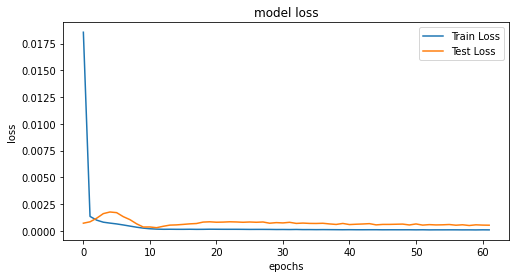

In [42]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

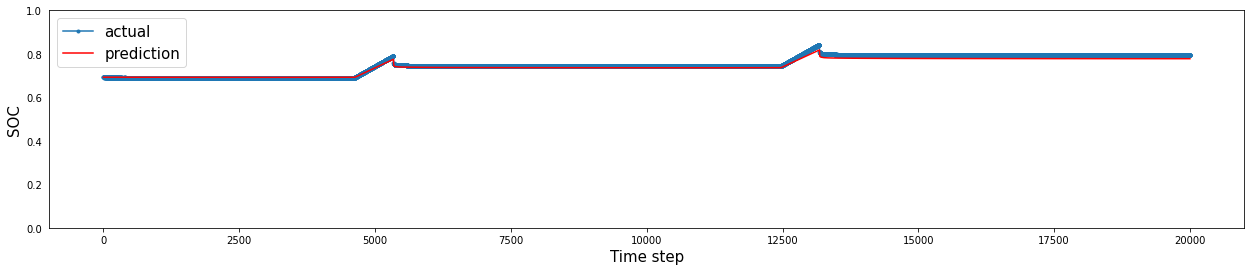

In [43]:
aa=[x for x in range(20000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_test[0][:20000], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:20000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

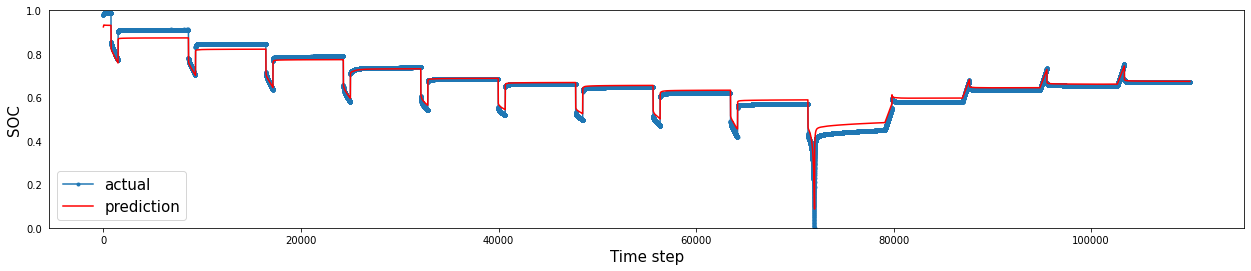

In [44]:
aa=[x for x in range(110000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_train[0][:110000], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:110000], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.ylim((0,1))
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();